# ACSE-7 (Inversion and Optimisation)  <a class="tocSkip"></a>

# Homework Lecture 2: Unconstrained Optimisation (solutions) <a class="tocSkip"></a>

<font size="1pt">Some $\LaTeX$ definitions hidden in this cell (double-click to reveal)</font>
$
\renewcommand\vec[1]{\mathbf{#1}}
\newcommand\mat[1]{\underline{\mathbf{#1}}}
\newcommand\R{\mathbb{R}}
\newcommand\todo[1]{\textcolor{red}#1}
$

In [1]:
import numpy as np
import scipy.linalg as sl
import matplotlib.pyplot as plt
# font sizes for plots
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

In [2]:
%matplotlib inline

# Identifying Local Minima

Find the stationary points of the following functions analytically and identify which ones are local minima, without making any graphs.

* $f(x) = x^3 + 6 x^2 - 63 x + 1$

### Solution <a class="tocSkip"></a>
First we find the stationary points of $f$ by solving $f'(x)=0$:
    
$$
  f'(x) = 3 x^2 + 12 x - 63 = 3 (x - 3) (x + 7) = 0 \implies x=3 \;\;\; \text{or} \;\;\; x=-7
$$

Then we check the second derivative in these points:

\begin{align*}
  f''(x) = 6 x + 12 \\
  f''(3) = 30 \;\;\; \text{and} \;\;\; f''(-7) = -30
\end{align*}

Thus we see that only in the stationary point $x=3$ the second derivative is positive, and the one at $x=-7$ has $f''(x)<0$. This means that $x=3$ must be the only local minimum.

* $f(x) = -\ln(\cos(x)+1)$

### Solution <a class="tocSkip"></a>
We should note that this function is not actually defined in points where $\cos(x)+1=0$, i.e. $x=\tfrac 32\pi + 2n\pi$ for $n\in \mathbb{Z}$. Outside these points however the function is well defined and twice differentiable:
    
\begin{align*}
  f'(x) &= -\frac 1{\cos(x)+1} \cdot -\sin(x) = \frac{\sin(x)}{\cos(x) + 1} \\
  f''(x) &= \frac{\cos(x)\left(\cos(x) + 1\right) - \sin(x)\cdot -\sin(x)}{\left(\cos(x) + 1\right)^2} = \frac{\cos^2(x) + 1 + \sin^2(x)}{\left(\cos(x) + 1\right)^2}
  = \frac 2{\left(\cos(x) + 1\right)^2}
\end{align*}

The stationary points are found to be where $\sin(x)=0$, i.e. $x=n\pi$ for $n\in\mathbb{Z}$. The second derivative is always positive. So all of these are local minima.

* $f(x, y) = x^4 + y^4 + 2 x^2 y^2 - 2 x^2 + 2 y^2$

### Solution <a class="tocSkip"></a>
The first derivatives are:

$$
  f'(x,y) =
  \begin{pmatrix}
     4 x^3 + 4 x y^2 - 4 x \\
     4 y^3 + 4 x^2 y + 4 y
  \end{pmatrix}
  =
  \begin{pmatrix}
    4 x \left(x^2 + y^2 - 1\right) \\
    4 y \left(y^2 + x^2 + 4\right)
  \end{pmatrix}
$$

For a stationary point, we need both components to be zero simultaneously. The factor $y^2+x^2+4$ in the second component ($\frac{\partial f}{\partial y}$) is always bigger than zero, so the only way for that component to be zero is if $y=0$. Substituting $y=0$ in the first component, we get $4 x(x^2 -1)=0$, so $x=0$, $x=-1$, or $x=1$. Thus we have identified 3 stationary points: $(-1,0), (0,0),$ and $(1,0)$.
    
The second derivative (Hessian) is given by

$$
  f''(x, y) = 
  \begin{pmatrix}
     12 x^2 + 4 y^2 - 4 & 8 xy \\
     8 xy & 12 y^2 + 4 x^2 + 4
  \end{pmatrix}
$$

which in the stationary points evaluates to

$$
  f''(-1, 0) = 
  \begin{pmatrix}
     8 & 0 \\
     0 & 8
  \end{pmatrix},
    f''(0, 0) = 
  \begin{pmatrix}
     -4 & 0 \\
     0 & 4
  \end{pmatrix},
    f''(1, 0) = 
  \begin{pmatrix}
     8 & 0 \\
     0 & 8
  \end{pmatrix}
$$

The Hessian in $(-1,0)$ and $(1,0)$ are SPD and thus these stationary points correspond to local minima. The Hessian in $(0,0)$ identifies a saddle point, with a maximum of $f$ in the $x$-direction (along the $x$-axis) and a minimum in the $y$-direction.

You can use the following code to visualise the result

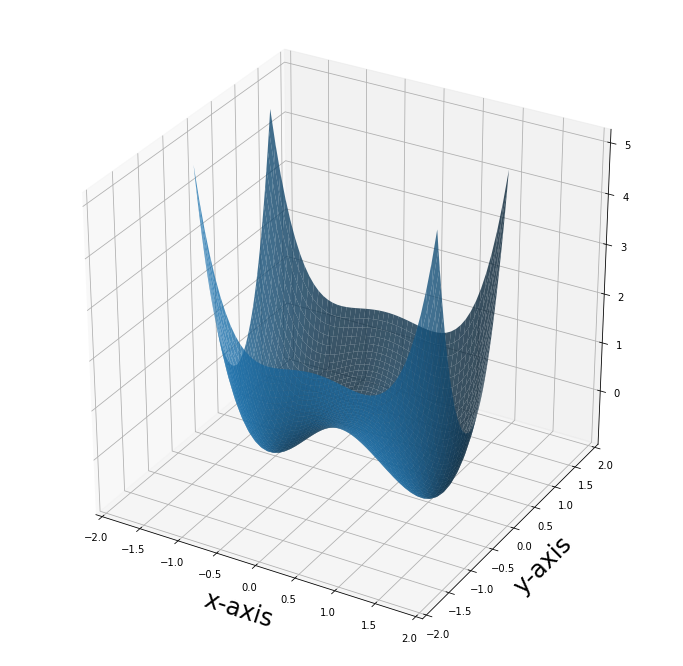

In [3]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.axis([-2,2,-2,2])
xr = np.linspace(-1.5, 1.5, 50)
yr = np.linspace(-0.8, 0.8, 50)
# create a Nx x Ny x 2 (Nx=Ny=50) array of grid points
xy = np.array(np.meshgrid(xr, yr)).T
x = xy[:,:,0]
y = xy[:,:,1]
f = x**4 + y**4 + 2*x**2*y**2 - 2*x**2  + 2*y**2
ax.plot_surface(xy[:,:,0], xy[:,:,1], f, alpha=0.8)
ax.set_xlabel('x-axis', size=24, labelpad=10)
ax.set_ylabel('y-axis', size=24, labelpad=10);

# Symmetric Positive Definite and Positive Semi-Definite Matrices
* For the following matrices compute the eigenvalues (either analytically or use [`scipy.linalg.eigh`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.eigh.html)), and determine which ones are positive definite, and which ones are positive semi-definite, and which ones are neither.

\begin{align*}
  \mat A_1 &= \begin{pmatrix}
    2 & 1 \\ 1 & 2
  \end{pmatrix} &
  \mat A_2 &= \begin{pmatrix}
    -2 & 1 \\ 1 & -2
  \end{pmatrix} \\
  \mat A_3 &= \begin{pmatrix}
    1 & -1 \\ -1 & 1
  \end{pmatrix} &
  \mat A_4 &= \begin{pmatrix}
    -1 & 2 \\ 2 & -1
  \end{pmatrix}
\end{align*}

* In the following 4 figures we have plotted the graph of $f(\vec x) = \vec x^T\mat A_i\vec x$ for $i=1,2,3,4$ in random order. Can you figure out which matrix $\mat A_i$ corresponds to which figure?

### Solution <a class="tocSkip"></a>
    
We give three methods to obtain the eigenvalues:

1. **Analytically (standard method):** The standard method to obtain eigenvalues is to solve the following equation

$$
  \det \left(\mat A - \lambda \mat I\right) = 0
$$

Working this out for $\mat A_1$:

\begin{align*}
  \det \left(\mat A_1 - \lambda \mat I\right) &= (2-\lambda)(2-\lambda)-1\cdot 1 \\
  &= \lambda^2 -4 \lambda + 3 \\
  &= (\lambda -3)(\lambda -1) = 0
\end{align*}

which means $\lambda=1$ or $\lambda=3$

2. **Analytically (using determinant and trace):** For a 2x2 matrix the 2 eigenvalues can also be obtained from the following identities:

\begin{align*}
  \text{Tr}(\mat A) &= \sum_i \lambda_i = \lambda_1 + \lambda_2 \\
  \det(\mat A) &= \prod_i \lambda_i = \lambda_1\cdot\lambda_2
\end{align*}

where $\text{Tr}(A)=\sum_i A_{ii}$, the sum of the diagonal. For matrix $\mat A_i$ we get:

\begin{align*}
  2 + 2 = 4 &= \lambda_1 + \lambda_2 \\
  2\cdot 2 - 1\cdot 1 = 3 &= \lambda_1 \cdot \lambda_2
\end{align*}

and again we obtain $\lambda_1=1$ and $\lambda_2=3$.

3. **Using scipy:** The function ```scipy.linalg.eigh``` returns two arrays, the first containing the eigenvalues, and the second the eigenvectors. For matrix $\mat A_i$ we use the following code
to print the eigenvalues only:

In [4]:
print(sl.eigh([[2,1], [1,2]])[0])

[1. 3.]


NOTE: In the notebooks in this course we use `import scipy.linalg as sl`, hence `sl.eigh`.

The eigenvalues of the 4 matrices are:

\begin{align*}
  \text{for matrix }&\mat A_1: & \lambda_1&=1, & \lambda_2&=3 \\
  \text{for matrix }&\mat A_2: & \lambda_1&=-3, & \lambda_2&=-1 \\
  \text{for matrix }&\mat A_3: & \lambda_1&=0, & \lambda_2&=2 \\
  \text{for matrix }&\mat A_4: & \lambda_1&=-3, & \lambda_2&=1 \\
\end{align*}

This means that matrix $\mat A_1$ is *positive definite* (both eigenvalues positive) and $\mat A_3$ is *positive semi-definite* (eigenvalues positive or zero). Matrix $\mat A_2$ (both negative) is also called *negative definite*, and $\mat A_4$ (negative and positive eigenvalues) *indefinite*.

The two eigenvalues characterise the behaviour of the function in the two orthogonal directions associated with the two eigenvectors: for a positive eigenvalue it looks like a parabola with positive coefficient:
$y=ax^2, a\gt 0$ with a minimum in the origin, and for negative value like a parabola with negative coefficient and a maximum in the origin. Therefore for matrix $\mat A_1$ with two positive eigenvalues, we expect the function to increase in all directions from the origin (the minimum), which corresponds to figure <b>c</b>. Matrix $\mat A_2$ we expect the opposite, a maximum in the origin which is seen in figure <b>b</b>. Matrix $\mat A_3$ had one positive and one zero eigenvalue, so we expect the function to be flat in one direction and a positive-coefficient parabola in the other: figure <b>d</b>. Finally, matrix $\mat A_4$ has both a negative and a postive eigenvalue, and so the origin acts like a minimum in one direction and a maximum in the other: a saddle point! This matches with figure <b>a</b>.

The plots were created using the following code:

[-3.  1.]
[-3. -1.]
[1. 3.]
[-2.  0.]


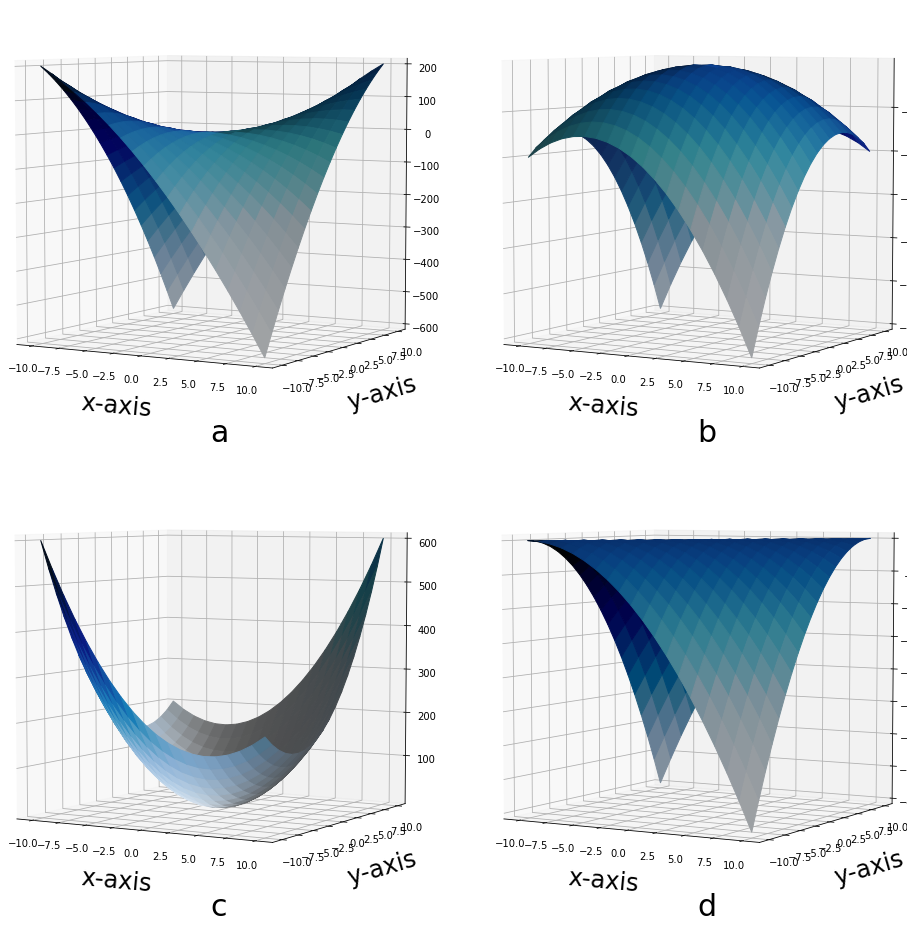

In [5]:
from mpl_toolkits.mplot3d import Axes3D

A_array = np.array([
    [[-1, 2], [2, -1]],
    [[-2, 1], [1, -2]],
    [[2, 1], [1, 2]],
    [[-1,1], [1,-1]]
])

fig = plt.figure(figsize=(16,16))

x = np.linspace(-10, 10, 20)
y = np.linspace(-10, 10, 20)
# xy are the locations of the horizontal grid, it is a Nx x Ny x 2 array
xy = np.array(np.meshgrid(x, y)).T

for i, A in enumerate(A_array): #zip(A_array, axes.flatten()):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    # at every point x_ij compute the product \sum_k x_ijk A_kl
    # axes argument refers to last axis (-1) of x and first (0) of A
    xT_A = np.tensordot(xy, A, axes=(-1,0))
    # compute f = x^T A x, with fxy_ij = \sum_l xT_A_ijl x_ijl
    fxy = (xT_A * xy).sum(axis=-1)

    from matplotlib.colors import LightSource
    from matplotlib import cm
    ls = LightSource(270, 45)
    # To use a custom hillshading mode, override the built-in shading and pass
    # in the rgb colors of the shaded surface calculated from "shade".
    rgb = ls.shade(fxy, cmap=cm.Blues)
    ax.plot_surface(xy[:,:,0], xy[:,:,1], fxy, facecolors=rgb);
    ax.set_xlabel('x-axis', size=24, labelpad=10)
    ax.set_ylabel('y-axis', size=24, labelpad=10)
    ax.view_init(elev=5)
    ax.dist = 8
    ax.text2D(0.5,-0.1,'abcd'[i], transform=ax.transAxes, size=30)
    print(sl.eigh(A)[0])

# Quadratic functions
Suppose we have $n$ different locations (say in 2D) each given by a vector $\vec{\hat x}_i=(\hat x_{i,1}, \hat x_{i,2})$ and we like to find a new location $\vec x=(x_1, x_2)$ that is close to all of these. We could measure the total distance between $\vec x$ and the other locations as

$$
  \text{dist}(\vec x) = \sum_{i=1}^n \| \vec x - \vec{\hat x}_i \| = \sum_i \sqrt{(x_1-{\hat x}_{i,1})^2 + (x_2-{\hat x}_{i,2})^2}
$$

To simplify matters a little however, we decide to use the squared distance as our measure of choice

$$
  \text{dist}^2(\vec x) = \sum_{i=1}^n \| \vec x - \vec{\hat x}_i \|^2 = \sum_i (x_1-{\hat x}_{i,1})^2 + (x_2-{\hat x}_{i,2})^2
$$

This is clearly a quadratic function in $\vec x$.

* try to write $\text{dist}^2(\vec x)$ in the standard form:
$$
  \text{dist}^2(\vec x) = \tfrac 12\vec x\mat A\vec x - \vec b^T\vec x + c,
$$
in other words find expressions for the entries of the $2\times 2$-matrix $\mat A$, the 2 entries of the vector $\vec b$ and for the scalar $c$.

**Hint**: as a first step we can work out $\text{dist}^2(\vec x)$ a little further

\begin{align*}
  \text{dist}^2(\vec x) &= \sum_{i=1}^n x_1^2 -2 x_1 \hat{x}_{i,1} + \hat{x}_{i,1}^2 
  + x_2^2 -2 x_2 \hat{x}_{i,2} + \hat{x}_{i,2}^2 \\
  &= n x_1^2 + n x_2^2 -2 \left(\sum_{i=1}^n \hat{x}_{i,1}\right) x_1  - 2\left(\sum_{i=1}^n
  \hat{x}_{i,2}\right) x_2 + \sum_{i=1}^n  \hat{x}_{i,1}^2 + \hat{x}_{i,2}^2
\end{align*}

to make it clear what the different terms in $x_1$ and $x_2$ are.

## Solution <a class=tocSkip></a>

From the hint we can quickly see what the quadratic, linear and constant terms are. The standard form is then given by

$$
   \text{dist}^2(\vec x) = \tfrac 12
   \begin{pmatrix}
     x_1 & x_2
   \end{pmatrix}
   \begin{pmatrix}
     2n & 0 \\ 0 & 2n
   \end{pmatrix}
   \begin{pmatrix}
     x_1 \\ x_2
   \end{pmatrix}
   - \begin{pmatrix} 2 \sum_{i=1}^n \hat{x}_{i,1} & 2 \sum_{i=1}^n \hat{x}_{i,2} \end{pmatrix}
   \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
   + \sum_{i=1}^n  \hat{x}_{i,1}^2 + \hat{x}_{i,2}^2
$$

and thus

$$
  \mat A = 2n \mat I,\;\;\;
  \vec b = 2 \sum_{i=1}^n \vec{\hat{x}}_i
$$

* Using the standard quadratic form, find the minimum of $\text{dist}^2(\vec x)$. Try to find an expression as simple as possible and explain the answer in words.

## Solution <a class=tocSkip></a>
From the lecture we have learnt that the stationary point is found by solving the system $\mat A\vec x=\vec b$, and since $\mat A$ is SPD we know this stationary point is the minimum. The system is solved easily

$$
  \vec x = \mat A^{-1} \vec b = \begin{pmatrix} \frac 1{2n} & 0 \\ 0 &\frac 1{2n} \end{pmatrix} 2\sum_{i=1}^n \vec{\hat x}_i
  = \frac{\sum_{i=1}^n \vec{\hat x}_i}n
$$

the last expression is simply the (arithmetic) mean of the $n$ positions $\vec{\hat x}_i$.

Do you expect the minimum of $\text{dist}(\vec x)$ (see its definition above *with* the square roots) to be the same location? The function $\text{dist}(\vec x)$ is a more general nonlinear function which we'll learn how to minimize numerically in the next lecture.

# Conjugate Gradient Method
* Solve the following, simple linear system using the Conjugate Gradient method *by hand*:

$$
  \begin{pmatrix}
    1 & 0 \\
    0 & 2 
  \end{pmatrix}
  \begin{pmatrix}
     x \\ y
  \end{pmatrix}
  =
  \begin{pmatrix}
    1 \\ 1
  \end{pmatrix}
$$

using $\vec x^{(0)}=(0,0)^T$ as the initial guess.
<br><br>
Draw the vector $\vec x^{(1)}-\vec x^{(0)}$ and $\vec x^{(2)}-\vec x^{(1)}$. Are they orthogonal? Are they perhaps $\mat A$-orthogonal? What about $\vec r^{(0}$ and $\vec r^{(1)}$ ?

## Solution <a class="tocSkip"></a>
Following the algorithm given in section 4.6 of lecture 5, we can work out:

$$
\newcommand\two[2]{\begin{pmatrix} #1 \\ #2 \end{pmatrix}}
\begin{align*}
  \vec p^{(0)} &= \vec r^{(0)} = \two 11 \\
  \alpha^{(0)} &= \frac 23 \\
  \vec x^{(1)} &= \two 00 + \tfrac 23\two 11 = \two{\tfrac 23}{\tfrac23} \\
  \vec r^{(1)} &= \two 11 - \tfrac 23\two 12 = \two{\tfrac 13}{-\tfrac 13}  \\
  \beta^{(1)}  &= \frac{\tfrac 29}{2} = \frac 19 \\
  \vec p^{(1)} &= \two{\tfrac 13}{-\tfrac 13} + \tfrac 19\two 11 = \two{\tfrac 49}{-\tfrac 29} \\
  \alpha^{(1)} &= \frac{\tfrac 29}{\tfrac{16}{81}+\tfrac 8{81}}=\frac{18}{24}=\frac 34 \\
  \vec x^{(2)} &= \two{\tfrac 23}{\tfrac23} + \tfrac 34 \two{\tfrac 49}{-\tfrac29} = \two 1{\tfrac 12}
\end{align*}
$$

You can also follow the steps at the end of section 4.3. Note however that the $\beta$ in section 4.3 and 4.4 have a different sign convention (see the last paragraph of section 4.5).

In the figure below we see that $\vec x^{(1)}-\vec x^{(0)}$ and $\vec x^{(2)}-\vec x^{(1)}$ are *not* orthogonal; They are $\mat A$-orthogonal however. As expected, $\vec r^{(0}$ and $\vec r^{(1)}$ *are* orthogonal.

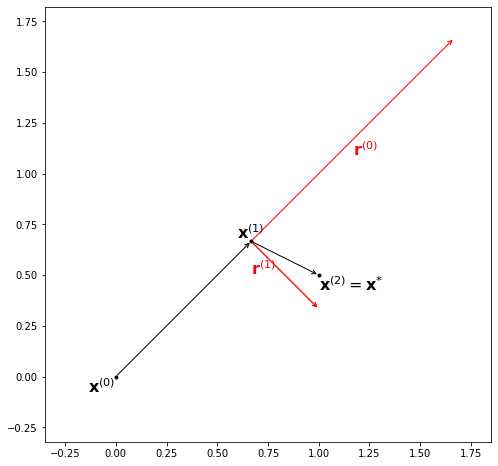

In [6]:
plt.figure(figsize=(8,8))
x = np.array([[0,0], [2./3, 2./3], [1, .5]])
plt.plot(x[:,0], x[:,1], '.k')
plt.annotate(r"${\bf x}^{(0)}$", x[0], fontsize=16,
             horizontalalignment='right', verticalalignment='top')
plt.annotate(r"${\bf x}^{(1)}$", x[1], fontsize=16,
             horizontalalignment='center', verticalalignment='bottom')
plt.annotate(r"${\bf x}^{(2)}={\bf x}^{*}$", x[2], fontsize=16,
             horizontalalignment='left', verticalalignment='top')
plt.annotate("", x[1], xytext=x[0], arrowprops={'arrowstyle': '->'})
plt.annotate("", x[2], xytext=x[1], arrowprops={'arrowstyle': '->'})
plt.annotate("", x[1]+[1,1], xytext=x[1], arrowprops={'arrowstyle': '->', 'color':'red'})
plt.annotate("", x[1]+[1./3,-1./3], xytext=x[1], arrowprops={'arrowstyle': '->', 'color':'red'})
plt.annotate(r"${\bf r}^{(0)}$", x[1]+[.5,.5], color='red', fontsize=16,
             horizontalalignment='left', verticalalignment='top')
plt.annotate(r"${\bf r}^{(1)}$", x[1]+[1//6,-1./6], color='red',  fontsize=16)
plt.annotate("", x[1]+[1./3,-1./3], xytext=x[1], arrowprops={'arrowstyle': '->', 'color':'red'})
plt.plot([-0.25,1.75],[-0.25,1.75],'.', color='white')  # ensure these points are in view after axis equal
plt.axis("equal");

# Portfolio Selection

## Covariance Matrix
The covariance matrix $\mat\Sigma$ is an important tool in statistics and probability theory. For $n$ different signals/time series/random variables $X_i$ of data, it computes the covariance between the different pairs of data. The entries are given by

$$
  \Sigma_{ij} = \mathop{Cov}(X_i, X_j) =
  \left\langle\left(X_i - \mu_i \right)\left(X_j - \mu_j\right)\right\rangle
$$

where $\langle\cdot\rangle$ is the mean (or expectation value in the context of random variables in probability theory), and $\mu_i$ are the means of the data

$$
  \mu_i = \left\langle X_i \right\rangle
$$

Note that the elements on the diagonal indicate the variance of the individual data series: $\Sigma_{ii} = \sigma^2(X_i)$, a measure of the spread of the values from their mean. If $Y$ is a linear combination of the $n$ data series:

$$
  Y = \sum w_i X_i
$$

with weights $w_i$ forming a vector $\vec w\in \R^n$, then variance of $Y$ can be calculated, using the $\Sigma$ matrix, as:

\begin{align*}
  \vec w^T\Sigma\vec w
  &=
  \sum_{i, j} \left\langle w_i\left(X_i - \mu_i \right)w_j\left(X_j - \mu_j\right)\right\rangle \\
  &=
  \left\langle\left( Y - \sum_i w_i\mu_i \right)\left(Y - \sum_j w_j\mu_j\right)\right\rangle \\
  &=
  \left\langle\left( Y - \left\langle Y\right\rangle \right)\left( Y - \left\langle Y\right\rangle \right)\right\rangle \\
  &= \left\langle\left( Y - \left\langle Y\right\rangle \right)^2\right\rangle
  = \sigma^2(Y)
\end{align*}

* Show that the covariance matrix is symmetric, and positive *semi*-definite, but is not always symmetric positive definite (SPD). Hint: for a counter example, assume that the data series $X_i$ are *not* linearly independent; Then (by definition) there is a linear combination such that $\sum_i w_i X_i = 0$. Can you find another counter-example?

### Solution <a class="tocSkip"></a>
Symmetry of the covariance matrix follows immediately from its definition. To show that the matrix is positive semi-definite, we need to show that
    
$$
  \vec w^T \Sigma\vec w \geq 0 \;\;
  \text{for all}\;
  \vec w\in\R^n
$$

For any $\vec w\in\R^n$, we can define a $Y=\sum_i w_i X_i$, and as was already shown above

$$
\vec w^T \Sigma\vec w
= \left\langle\left( Y - \left\langle Y\right\rangle \right)^2\right\rangle
\geq 0
$$

To show that the matrix is not symmetric-positive definite, we need to show that
not for all $\vec w$: 

$$
  \vec w^T \Sigma\vec w > 0
$$

As a counter-example we can indeed consider the case where $\sum_i w_i X_i=0$, in that case we have

$$
\vec w^T \Sigma\vec w
= \left\langle\left( 0 - \left\langle 0\right\rangle \right)^2\right\rangle
= 0
$$

Another counterexample, is where we have a linear combination $Y=\sum_i w_i X_i$, where $Y$ is the constant series. Consider for instance any series $X_1$ and define $X_2=-X_1 + c$, then $Y=X_1+X_2 =c$. In that case $Y = \langle Y\rangle$, and thus

$$
\vec w^T \Sigma\vec w
= \left\langle\left( Y - \left\langle Y\right\rangle \right)^2\right\rangle
= 0
$$

## Covariance of Stock Price Data
For the analysis of a time series of stock prices, we can download stock price data for a selection of stocks with the code below (this requires a "pip install" of `pandas_datareader`).

**NOTE:** the method in the following cell no longer works; instead use the stocks.csv file in this directory, read in in the following cell, or download your own daily stock price data for a number of different stocks.

In [ ]:
import pandas_datareader.data as stock_data
import datetime
# period of analysis: last 5 years
end = datetime.datetime.now()
start = end - datetime.timedelta(days=365*5)
# our selection of stocks (Starbucks, Facebook, Walmart, West Pharmac. and Disney)
# you can choose whatever other selection you want from https://iextrading.com/trading/eligible-symbols/
stocks = ['SBUX', 'FB', 'WMT', 'WST', 'DIS']

# read the data, plot it and write to a .csv
f = stock_data.DataReader(stocks, 'iex', start, end)
ax1 = f['close'].plot()
f['close'].to_csv('stocks.csv')
p = np.array(f['close'])

Alternatively, you can read the data for this selection from the `stocks.csv` datafile provided with this lecture

In [8]:
p = np.genfromtxt('stocks.csv', delimiter=',', skip_header=1, usecols=(1,2,3,4,5))

The covariance matrix for this data can be computed using numpy's [cov](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.cov.html) function. Note that the data that is provided in the first argument should have a shape of $n\times m$, where $n$ is the number of time series (different stocks) and $m$ the number of values in each series:

In [9]:
print(p.T.shape)
sigma = np.cov(p.T)
print(sigma.shape)

(5, 1257)
(5, 5)


* Check that the matrix `sigma` is indeed symmetric, and use the function `eigh` in `scipy.linalg` to check that $\Sigma$ in this case is in fact SPD.

### Solution <a class="tocSkip"></a>
To check the symmetry of `sigma`, we check that the difference with its transpose is the zero matrix - which in turn we check by looking at its norm

In [10]:
print(sl.norm(sigma - sigma.T))

0.0


The function `eigh` has two return arguments. The first is an array of eigenvalues, the second one contains the corresponding eigenvectors. A symmetric real-valued matrix is SPD if all its eigenvalues are strictly positive.

In [11]:
w, v = sl.eigh(sigma)
print(w)
print(all(w>0.0))

[  12.0188787    33.30689164   95.60156166  107.2124148  2257.37154329]
True


## Portfolio Selection
Using this data we can perform a simplified optimisation for the selection of a number of stocks balancing the conflicting objectives of profit maximisation and risk reduction. *NOTE*: historic time-series of stock prices should *not* be used as a prediction of return of investment in real-life.

A very simplistic model for the return of investment of a stock, is to look at its day-to-day change in closing price. So if for each of the $n$ stocks, we have $m$ days of closing prices, we create a new array of $m-1$ entries containing the difference between the next day's closing price and the current day's closing price. Then, we turn it into a rate of return by dividing by the daily stock price. So if $p_{i,j}$ is the prize of stock $i$ on day $j$, our rate of return is calculated as

$$
  R_{i,j} = \frac{p_{i,j+1}-p_{i,j}}{p_{i,j}}, \;
  \text{ for }
  1\leq i\leq n, \; 1\leq j\leq m-1
$$

This represents the amount returned for each pound/dollar invested (our sample data is of American stocks, so from now on we'll assume dollars). Let's apply this to the data above:

In [12]:
R = (p[1:,:]-p[0:-1,:])/p[0:-1]

An investor would like to buy a selection of the $n$ different stocks (the portfolio). Let $w_i$ be the amount of money invested in each stock. The expected return for this investment is

$$
  \langle R(\vec w)\rangle = \sum w_i \langle R_i\rangle
$$

and thus the expected return is $\langle R(\vec w)\rangle=\sum_i w_i\langle R_i\rangle$. A measure of the volatility of the investment, and thus the risk, is the variance

$$
  \sigma^2(R(\vec w)) = \sum_{i=1}^n \sum_{j=1}^n w_i\Sigma_{ij}w_j
$$

If the investor wants to find a portfolio that balances the amount of risk (measured by the variance), and the return of investment, he could minimise a function of the following form

$$
   f(\vec w) = \sigma^2(R(\vec w)) - q \langle R(\vec w)\rangle
$$

Here $q$ is a chosen parameter $q\geq 0$ that balances how much the return should weigh against risk. For a low value of $q$ reducing the risk is deemed to be more important. For a large value of $q$ obtaining a large return is more important. Note the minus sign in front of the $R$ term: by *minimizing* $f$ we *maximize* the return.

We can write $f$ in vector form and recognize it as a standard quadratic function

$$
  f(\vec w) = \vec w^T \Sigma\vec w - q \vec r^T\vec w
$$

* Using a value of $q=0.3$, compute the optimal portfolio by minimizing $f(\vec w)$.

* Check that the optimal portfolio $\vec w$ satisfies $\sum w_i\approx 1$. This means our portfolio sums to roughly a dollar, and thus the values $w_i$ reflect which fraction of a dollar we should spend on each stock. Compute the variance of the optimal portfolio and compare this with the diagonal of $\mat\Sigma$. Remember, the diagonal entries represent the variance in the return for each stock individually.

* Similarly, check the expected daily return for our portfolio and compare that with expected return for the individual stocks given by the entries $r_i$ of $\vec r$.

* Now, repeat, the same questions for a value of $q=30$

The results of the last question might be a little counter-intuitive. It seems the fraction of each stock that is suggested is exactly the same, it's just that we're advised to buy a hundred times more of each stock. On the one hand this is expected by the fact that we're actually just solving $\mat\Sigma\vec w=q\vec r$. On
the other hand we were asking for a much more risky investment by increasing $q$ by a factor of a hundred. 
This can be explained by the fact that although the return has also increased by a factor of a hundred, the variance has actually increased by a factor of $100^2$, and thus we are getting an investment in which the variance is much higher than when we were using $q=0.3$. You might argue that we should have used the square root of the variance (standard deviation) as a measure of risk. Or that we should have normalized the return, into a return per dollar (dividing by $\sum_i w_i$), and similarly normalizing the variance (dividing it by the square of $\sum_i w_i$) so that the two are comparable. This does make the function $f(\vec w)$ a little more complicated.

A simpler solution is to minimize $f(\vec w)$ with the *constraint* that $\sum_i w_i=1$, i.e. we are asking what the optimal investment is for a single dollar. Another reason to introduce constraints, is that the naive optimisation here allows negative values for $w_i$, i.e. that we should buy a negative amount of a certain stock. This could be interpreted in terms of derivatives, but in general might not be desired. A reasonable constraint could therefore be that $w_i \geq 0$. We will learn how to do this in lecture 8.

## Solution <a class="tocSkip"></a>
The asked for values can be computed with the following code (similar for $q=30$):

In [13]:
r = np.mean(R, axis=0)
sigma = np.cov(R.T)
q = 0.3
w = sl.solve(sigma*2, q*r)

print("Total investment:", w.sum())
print("Variance of portfolio:", w @ sigma @ w)
print("Variance of individual stocks:", np.diag(sigma))
print("Expected return of portfolio:", w @ r/w.sum())
print("Expected return of ind. stocks:", r)

Total investment: 1.0763375236914778
Variance of portfolio: 0.00011713763483849147
Variance of individual stocks: [0.00014122 0.00035277 0.00016631 0.00015003 0.0002209 ]
Expected return of portfolio: 0.0007255322316661941
Expected return of ind. stocks: [0.00048005 0.0009925  0.00065083 0.00039639 0.0007852 ]
